## 预处理

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from collections import defaultdict
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# %config InlineBackend.figure_format = 'svg'
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
%matplotlib notebook
%matplotlib notebook

In [3]:
# nbaData = pd.read_csv('./data/nba/nba.csv')
# nbaData.head()

In [4]:
# lionData = pd.read_csv('./data/lion-reference.csv',header=None)
# lionData.head()

In [5]:
# cactusData = pd.read_csv('./data/Cactus.txt',header=None,sep='\t')
# cactusData.head()

In [6]:
catData = pd.read_csv('./data/cat-reference.csv',header=None)
catData.head()

,0,1,2
0,0.013579,0.215377,-0.170891
1,0.010493,0.226649,-0.173601
2,0.020415,0.230665,-0.175927
3,0.060064,0.241075,-0.140388
4,0.057849,0.251924,-0.140969


寻找一种好的降维方法，正交化？

In [7]:
data = catData

In [8]:
N = len(data)
print("N :",N)

N : 7207


In [9]:
# a = preprocessing.normalize(data.values)
a = data.values

**设定最近邻的参数K**

In [10]:
k = 4

In [11]:
neigh = NearestNeighbors(n_neighbors=k+1) # 因为之后提取最近点时会包括点自身
neigh.fit(a)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [12]:
disMat,nodeMat = neigh.kneighbors(a)

In [13]:
print(disMat.shape)
print(disMat)

(7207, 5)
[[0.         0.01083073 0.01181896 0.01199689 0.01338931]
 [0.         0.01032152 0.01067763 0.01095375 0.01142065]
 [0.         0.0072728  0.00889288 0.01095375 0.01156028]
 ...
 [0.         0.0048267  0.00555392 0.00765566 0.00789152]
 [0.         0.00519887 0.00555392 0.00555816 0.0080563 ]
 [0.         0.00999151 0.01083073 0.01156028 0.01441222]]


In [14]:
print(nodeMat.shape)
print(nodeMat)

(7207, 5)
[[   0 7206   49    1   64]
 [   1   67   64    2   69]
 [   2    8   68    1 7206]
 ...
 [7204 7201 7205 7191 7203]
 [7205 7192 7204 7202 7203]
 [7206    7    0    2    8]]


<IPython.core.display.Javascript object>


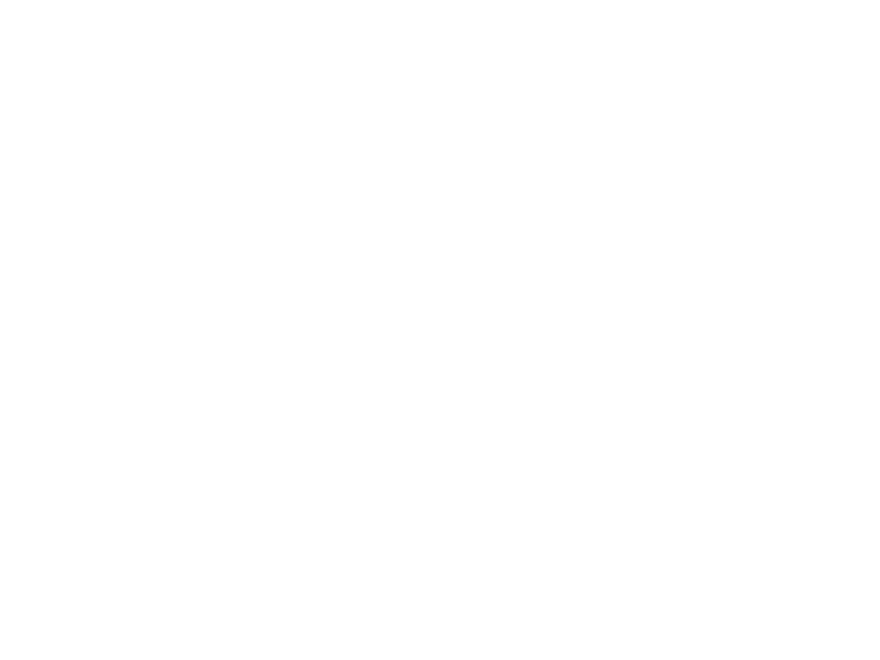

(array([ 370., 1016., 1162., 1246., 1523., 1623., 1348., 1122.,  878.,
         929.,  846.,  880.,  868.,  824.,  720.,  849.,  778.,  777.,
         717.,  613.,  589.,  664.,  565.,  521.,  520.,  497.,  445.,
         393.,  424.,  366.,  362.,  322.,  282.,  280.,  266.,  227.,
         182.,  255.,  248.,  223.,  194.,  113.,  194.,  154.,  145.,
         128.,  116.,   97.,   79.,   78.,   76.,   47.,   55.,   56.,
          45.,   35.,   32.,   27.,   37.,   10.,   36.,   38.,   24.,
          20.,   31.,   20.,   13.,   16.,   14.,   12.,   19.,   19.,
          18.,   15.,   11.,    0.,    2.,    8.,    3.,    3.,    4.,
           5.,    7.,    2.,    2.,    6.,    6.,    4.,    4.,    4.,
           4.,    2.,    6.,    0.,    2.,    2.,    2.,    4.,    0.,
           2.]),
 array([0.00010391, 0.00040969, 0.00071546, 0.00102124, 0.00132702,
        0.00163279, 0.00193857, 0.00224435, 0.00255013, 0.0028559 ,
        0.00316168, 0.00346746, 0.00377323, 0.00407901, 0.00438479

In [15]:
a = disMat.flatten()
plt.title('边的权值分布');
plt.hist(a[a.nonzero()],bins=100)

## 建图

In [16]:
G = nx.Graph()

In [17]:
G.add_nodes_from(range(nodeMat.shape[0]))

In [18]:
edges = []
for i,(neighbors,distances) in enumerate(zip(nodeMat,disMat)):
    edges +=[(i, neighbors[j], distances[j]) for j in range(k+1) if neighbors[j]!=i]
print(edges[:5])

[(0, 7206, 0.010830732800692664), (0, 49, 0.011818959810406333), (0, 1, 0.01199689459818665), (0, 64, 0.013389309840316665), (1, 67, 0.010321521447926208)]


In [19]:
G.add_weighted_edges_from(edges)

In [20]:
print('node size',len(G.nodes))

node size 7207


### 3D

In [21]:
fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig)
# ax.scatter3D(*data.to_numpy().T,marker='.')
for a,b,_ in edges:
    if np.random.rand()>0.5:
        ax.plot(*data.iloc[[a,b]].to_numpy().T,alpha=0.5,color='c')
ax.axis('equal')

<IPython.core.display.Javascript object>

(-0.08029670000000001,
 0.07838270000000001,
 -0.018174350000000002,
 0.40128535000000004)

### plain

In [22]:
# plt.figure(figsize=(8,8))
# pos = nx.spring_layout(G)
# nx.draw(G,node_shape='o',pos=pos,node_size=30,node_color='c',edge_color='#A0CBE2')

## 投票

https://networkx.github.io/documentation/stable/reference/algorithms/shortest_paths.html

In [23]:
#dis = dict(nx.all_pairs_bellman_ford_path_length(G))

In [24]:
# with open('disMat','w') as f:
#     f.write(str(N)+'\n')
#     for i in range(N):
#         for j in range(N):
#             try:
#                 d = dis[i][j]
#             except KeyError:
#                 d = -1
#             f.write(str(d)+' ')

In [25]:
# del dis

仅作为参考，现在使用c实现这一部分
```
nodeIdx = list(range(N))
samples = 50000
subSamples = 10000
th = 0.01
conditon = lambda a,b,c,d:abs(dis[a][b]-dis[c][d])<th and abs(dis[a][d]-dis[b][c])<th

votes = defaultdict(int)

for i in range(samples):
    a,b,c,d=np.random.choice(nodeIdx,4)
    if conditon(a,b,c,d):
        for j in range(subSamples):
            e,f = np.random.choice(nodeIdx,2)
            if conditon(a,b,e,f) and conditon(c,d,e,f):
                if b>a:
                    a,b=b,a
                if d>c:
                    c,d=d,c
                votes[(a,b)]+=1
                votes[(c,d)]+=1
```

In [26]:
a = np.loadtxt('./out.txt')
votes = defaultdict(int)
for i,j in zip(a.nonzero()[0],a.nonzero()[1]):
    v = a[i,j]
    assert v>0
    if i==j:continue
    if i<j:
        i,j=j,i
    votes[(i,j)] += v

In [27]:
votes

defaultdict(int,
            {(7159, 29): 8268.0,
             (7090, 47): 8182.0,
             (7112, 87): 8254.0,
             (7184, 98): 8419.0,
             (7130, 104): 8195.0,
             (7190, 107): 8284.0,
             (7161, 111): 8226.0,
             (7122, 116): 8472.0,
             (7054, 167): 8328.0,
             (7145, 194): 8169.0,
             (7173, 223): 8139.0,
             (7105, 242): 8191.0,
             (7080, 261): 8245.0,
             (7077, 272): 8321.0,
             (7165, 297): 8323.0,
             (7109, 334): 8259.0,
             (7135, 348): 8258.0,
             (7109, 370): 8299.0,
             (7184, 378): 8194.0,
             (7165, 384): 8294.0,
             (7201, 399): 8186.0,
             (7116, 402): 8208.0,
             (7055, 414): 8399.0,
             (7173, 443): 8245.0,
             (7090, 479): 8268.0,
             (7180, 619): 8422.0,
             (7111, 636): 8247.0,
             (7172, 653): 8271.0,
             (7137, 678): 8207.0,
 

In [28]:
# plt.xlim((0,50))
plt.title('votes分布')
plt.hist(votes.values(),bins=200)

(array([ 2.,  0.,  2.,  2.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  2.,  2.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  4.,  0.,  8., 10.,  6., 14., 14., 16., 18.,
        26., 30., 42., 44., 42., 34., 42., 46., 48.

In [ ]:
path = dict(nx.all_pairs_bellman_ford_path(G))

**设定votes的阈值**

In [ ]:
th_votes = 8000

In [ ]:
nodeSet = set()
for a,b in votes.keys():
    pi = path[a][b]
    if votes[(a,b)]>th_votes:
        nodeSet.add(pi[len(pi)//2])
print('len of nodeSet:',len(nodeSet))
print(nodeSet)

In [ ]:
# del path

## 构建子图

### 3D

In [ ]:
fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig)
ax.scatter3D(*data.to_numpy().T,marker='.',color='c',alpha=0.5)
ax.scatter3D(*data.iloc[[*nodeSet]].to_numpy().T,marker='.',s=30,color='r')
ax.axis('equal')

In [ ]:
G2 = G.subgraph(nodeSet)
edgeSet = G2.edges() # not set actually

In [ ]:
fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig)
# ax.scatter3D(*data.to_numpy().T,marker='.',color='c',alpha=0.5)
ax.scatter3D(*data.iloc[[*nodeSet]].to_numpy().T,marker='.',s=30,color='r',alpha=0.3)
for a,b in edgeSet:
    if np.random.rand()>-1:
        ax.plot(*data.iloc[[a,b]].to_numpy().T,alpha=0.5,color='k')
ax.axis('equal')

### plain

**在原图位置上展示**

In [ ]:
G2 = G.subgraph(nodeSet)
plt.figure(figsize=(8,8))
nx.draw(G2,pos=pos,node_shape='o',node_size=30,width=2)

In [ ]:
plt.figure(figsize=(8,8))
nx.draw(G,node_shape='o',pos=pos,node_size=30,pos=pos, node_color='c' ,edge_color='#A0CBE2')
nx.draw(G2,node_shape='o',pos=pos, node_size=30,width=2)
# nx.drawing.nx_pylab.draw_networkx_nodes(G,pos,nodeSet,node_size=50)
# nx.drawing.nx_pylab.draw_networkx_edges(G,pos,votes.keys(),width=1.5,edge_color='y')

**使用图布局算法(Fruchterman-Reingold force-directed algorithm)**

事实上默认就是用了图布局算法的

In [ ]:
plt.figure(figsize=(8,8))
nx.draw(G2,node_shape='o',node_size=30,width=2)

## 对提取的结点绘制knn图

In [ ]:
subData = data.iloc[list(nodeSet),:]
print("length of subData :",len(subData))
subData.head()

**设定k**

In [ ]:
k = 6

In [ ]:
# a = preprocessing.normalize(data.values)
b = subData.values

In [ ]:
neigh = NearestNeighbors(n_neighbors=k+1) # 因为之后提取最近点时会包括点自身
neigh.fit(b)

In [ ]:
disMat,nodeMat = neigh.kneighbors(b)

In [ ]:
G3 = nx.Graph()

In [ ]:
edges = []
for i,(neighbors,distances) in enumerate(zip(nodeMat,disMat)):
    edges +=[(i, neighbors[j], distances[j]) for j in range(k+1) if neighbors[j]!=i]
print(edges[:5])

In [ ]:
G3.add_weighted_edges_from(edges)

In [ ]:
fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig)
# ax.scatter3D(*data.to_numpy().T,marker='.')
for a,b,_ in edges:
    if np.random.rand()>0.:
        ax.plot(*data.iloc[[a,b]].to_numpy().T,alpha=0.5,color='c')
ax.axis('equal')

In [ ]:
nx.draw(G3,node_shape='o',node_size=30,node_color='c',edge_color='#A0CBE2')